# 6. NumPy 简介

NumPy（Numerical Python） 是 Python 语言的一个扩展程序库，支持大量的维度数组与矩阵运算，此外也针对数组运算提供大量的数学函数库。它主要用于数组计算，包含：
- 一个强大的 N 维数组对象 ndarray
- 广播功能函数
- 整合 C/C++/Fortran 代码的工具
- 线性代数、傅里叶变换、随机数生成等功能

NumPy 通常与 SciPy（Scientific Python）和 Matplotlib（绘图库）一起使用， 这种组合广泛用于替代 MATLAB，是一个强大的科学计算环境，有助于我们通过 Python 学习数据科学或者机器学习。

<div class="alert alert-block alert-info">
    NumPy 包的<b>核心对象</b>是 ndarray 对象。它封装了 Python 原生的同数据类型的 n 维数组，为了保证其性能优良，其中有许多操作都是代码在本地进行编译后执行的。
</div>

NumPy 为啥这么快呢？这主要有以下几个原因：
1. NumPy 的许多核心功能是通过 C 和 Fortran 语言实现的，它们由预编译的代码执行。这些底层语言通常比 Python 更快。
2. NumPy 数组在内存中是连续存储的，在数组上进行操作时可以充分利用硬件的缓存，减少内存访问的开销，提高访问速度。
3. NumPy 支持向量化操作，即代码中没有显示的循环、索引等（当然这也是预编译的 C 代码中“幕后”优化的结果），这可以更有效地利用底层优化。
4. NumPy 中的数组是使用固定大小的数据类型存储的，这使得对数组的操作可以更加高效。此外，NumPy 还提供了许多用于在数组上执行各种操作的函数和方法，这些函数和方法经过了优化，可以在数据量较大时提供高性能。

（列表的元素可以是任何对象，因此列表中所保存的是对象的指针；对于数值运算来说，这种结构显然比较浪费内存和 CPU 计算时间）


像我们日常生活中遇到的许多问题，都可以用数组来表示，比如通常的 excel 表格：

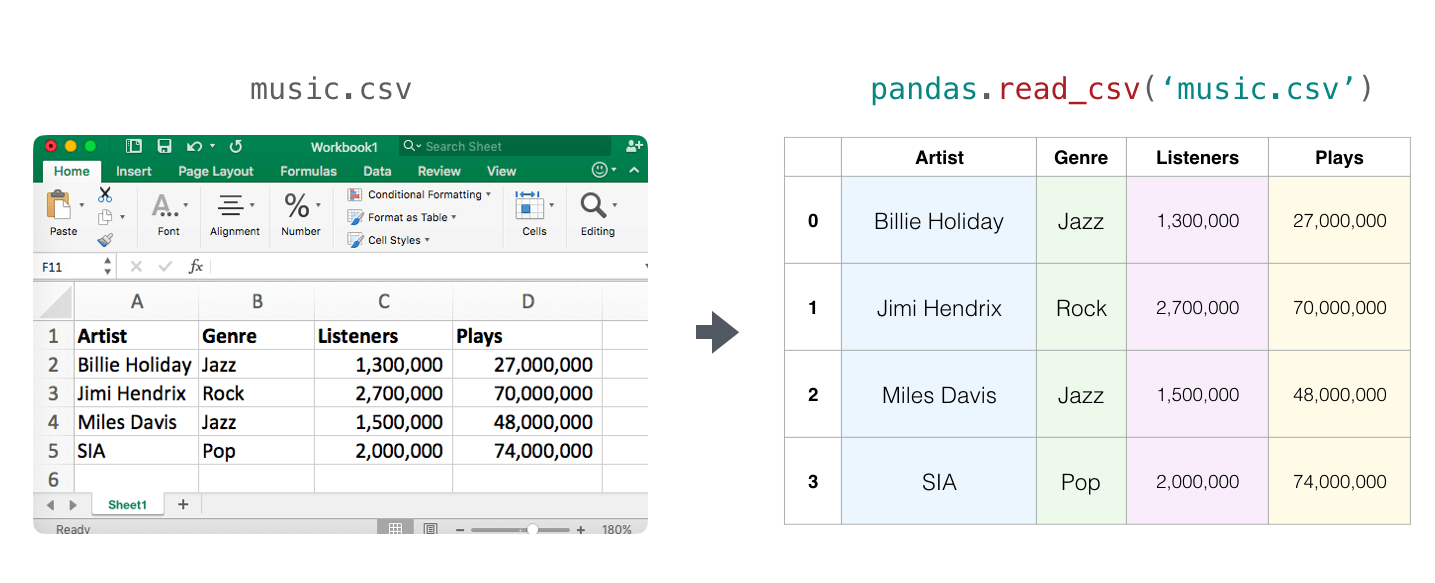

或者一张照片的灰度图，每个像素的灰度都可以用一个数来表示，这就构成了一个2维数组：

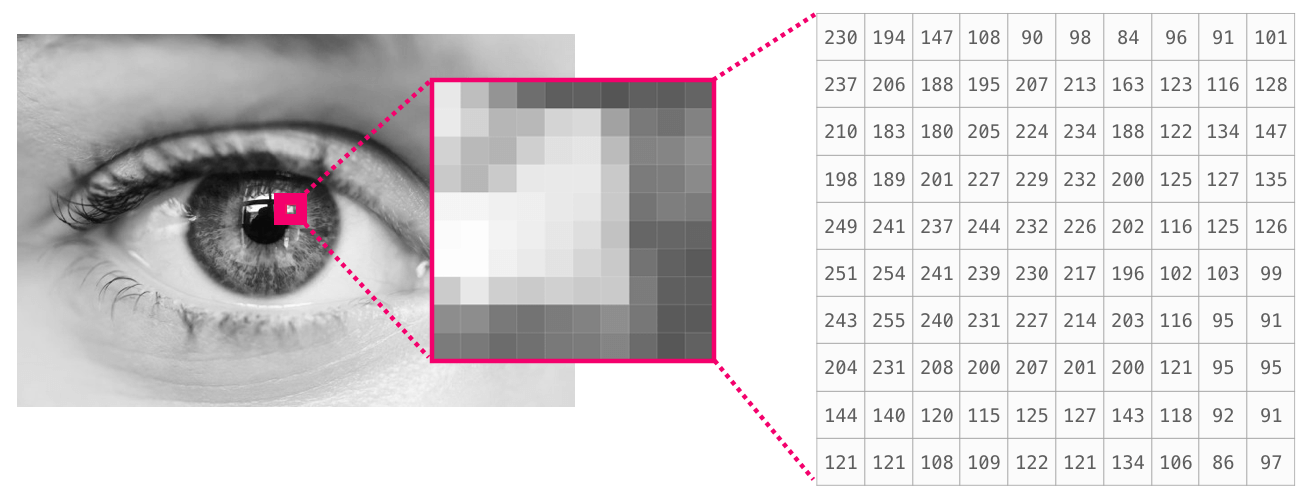

如果是彩色图片，考虑 RGB 三色表示，它就是一个3维数组：

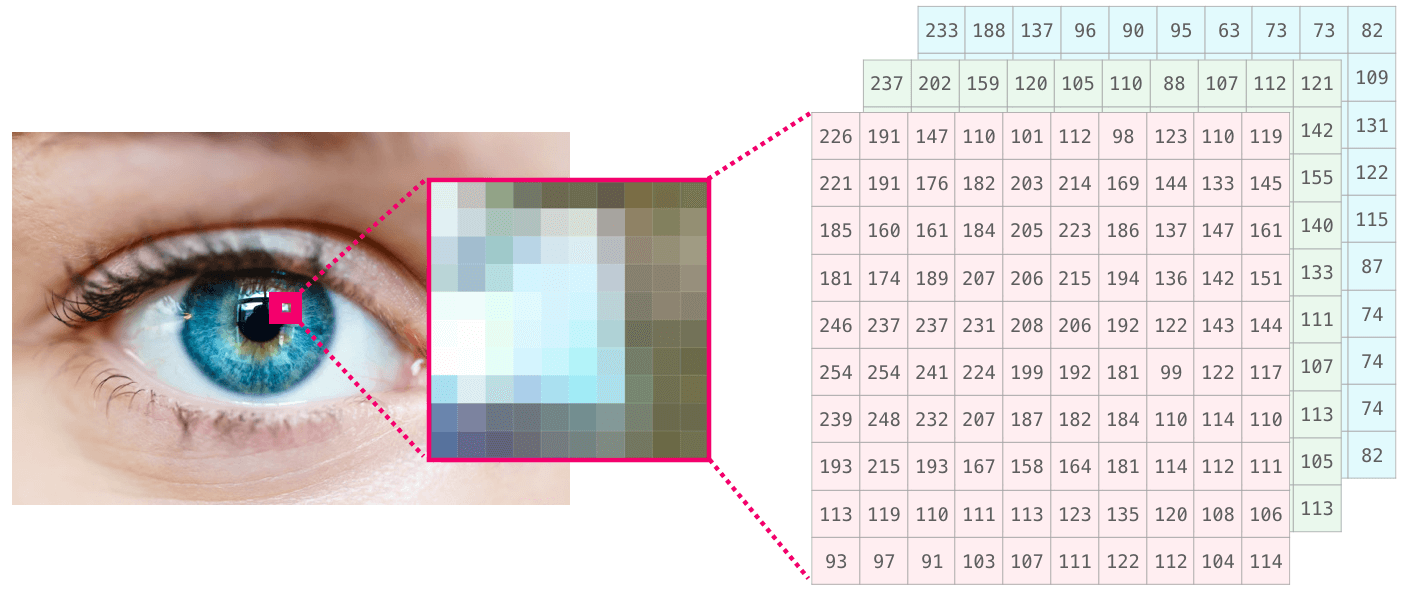

所以学好 NumPy（和线性代数）还是非常有必要滴！

In [3]:
import numpy as np # 起手式，一定要做的

## 6.1 线性代数基础
线性代数是数学中的一个分支，主要研究向量空间和线性映射的关系，这里我们也不去讨论太高深的数学。NumPy 提供了丰富的功能来处理数组、矩阵和向量等数据结构，这些功能和线性代数密切相关，甚至提供了 `numpy.linalg` 的线性代数模块。比如矩阵就可以看成是一个二维数组，每个元素由行、列作为来索引。

这里我们先简单介绍一些线性代数基础。

### 6.1.1 矩阵的概念
矩阵简单来说就是多行多列元素组成的一个集合，一个 $m\times n$ 的矩阵有 $m$ 行 $n$ 列个元素（当 $m=n$ 时，称为 $n$ 阶方阵），如：

$$
A = \begin{pmatrix}
a_{11} & a_{12} &\cdots & a_{1n}\\
a_{21} & a_{22} & \cdots & a_{2n}\\
\vdots & \vdots &\ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{pmatrix} = (a_{ij})_{m\times n}.
$$

只有对角线上有元素的方阵称为对角方阵，记作 $\mathrm{diag}(\lambda_1,\lambda_2,\cdots,\lambda_n)$，即

$$
\begin{pmatrix}
\lambda_1 & & & \\
& \lambda_2 & & \\
& & \ddots & \\
& & & &\lambda_n
\end{pmatrix}.
$$

对角线上全是 1 的方阵称为单位矩阵。

$$
\begin{pmatrix}
1 & & & \\
& 1 & & \\
& & \ddots & \\
& & & &1
\end{pmatrix}.
$$

### 6.1.2 矩阵的运算
加法：

$$
\begin{pmatrix}
a_{11} & a_{12} &\cdots & a_{1n}\\
a_{21} & a_{22} & \cdots & a_{2n}\\
\vdots & \vdots &\ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{pmatrix}
+
\begin{pmatrix}
b_{11} & b_{12} &\cdots & b_{1n}\\
b_{21} & b_{22} & \cdots & b_{2n}\\
\vdots & \vdots &\ddots & \vdots \\
b_{m1} & b_{m2} & \cdots & b_{mn}
\end{pmatrix}
=
\begin{pmatrix}
a_{11} + b_{11} & a_{12} + b_{12} &\cdots & a_{1n}+b_{1n}\\
a_{21} + b_{21} & a_{22} + b_{22} & \cdots & a_{2n} + b_{2n}\\
\vdots & \vdots &\ddots & \vdots \\
a_{m1}+b_{m1} & a_{m2} + b_{m2} & \cdots & a_{mn} + b_{mn}
\end{pmatrix}.
$$

数乘:
$$
cA = \begin{pmatrix}
ca_{11} & ca_{12} &\cdots & ca_{1n}\\
ca_{21} & ca_{22} & \cdots & ca_{2n}\\
\vdots & \vdots &\ddots & \vdots \\
ca_{m1} & ca_{m2} & \cdots & ca_{mn}
\end{pmatrix}.
$$

乘法：
$$
\begin{gather*}
A \times B = (a_{ij})_{m\times s} (b_{ij})_{s\times n} = (c_{ij})_{m\times n} =C,\\
\text{where} \quad c_{ij} = \sum_{k=1}^{s}a_{ik}b_{kj}, \quad (i\in \mathbb{Z}\leq m, j\in \mathbb{Z} \leq n).
\end{gather*}
$$
比如 $c_{32} = a_{31}b_{12} + a_{32}b_{22} + \cdots + a_{3s}b_{s2}$。

矩阵转置:

$$
A^{\mathrm{T}} = \begin{pmatrix}
a_{11} & a_{21} &\cdots &a_{m1}\\
a_{12} & a_{22} & \cdots &a_{m2}\\
\vdots & \vdots & \ddots &\vdots \\
a_{1n} & a_{2n} & \cdots & a_{mn}
\end{pmatrix} = (a_{ji})_{n\times m}.
$$

逆矩阵 $A^{-1}$ 满足 $A A^{-1} = A^{-1} A = \mathbb{I}$（只有方阵才有逆矩阵）。 在数学上如何具体计算出一个给定方阵的逆矩阵，我们在此不做介绍（交给程序来进行）。

### 6.1.3 向量
向量是矩阵的特殊类型，只有一行（或一列）的矩阵称为行向量（列向量），通常我们说的向量值得是列向量，如

$$
 x = \begin{pmatrix}
 x_1\\ x_2 \\ \vdots \\x_n
 \end{pmatrix}
 ,\quad y = \begin{pmatrix}
y_1\\y_2 \\\vdots \\ y_n
 \end{pmatrix}.
$$

它们的内积（就是高中学过的向量的数量积）定义为：

$$
\left\langle x, y \right\rangle = x^{\mathrm{T}} y = \sum_{i=1}^{n}x_iy_i = x_1y_1 + x_2y_2 + \cdots x_n y_n.
$$

### 6.1.4 行列式
矩阵的行列式（只有方阵才有行列式）可以通过递归思想来定义。

对于 1 阶矩阵，它的行列式为：

$$
\mathrm{det}(A) = |A| = |a_{11}| = a_{11}.
$$

对于 2 阶矩阵，它的行列式为：

$$
\mathrm{det}(A) = |A| = \begin{vmatrix}
a_{11}& a_{12}\\
a_{21}& a_{22}
\end{vmatrix} = a_{11}a_{22} - a_{12}a_{21}.
$$

对于 3 阶矩阵，它的行列式为：

$$
\mathrm{det}(A) = |A| = \begin{vmatrix}
a_{11}& a_{12}&a_{13}\\
a_{21}& a_{22}&a_{23}\\
a_{31}& a_{32} & a_{33}
\end{vmatrix}
 = a_{11}\begin{vmatrix}
 a_{22}&a_{23}\\
 a_{32}& a_{33}
 \end{vmatrix} - a_{12}
 \begin{vmatrix}
a_{21}&a_{23}\\
a_{31}&a_{33}
 \end{vmatrix} + a_{13} \begin{vmatrix}
    a_{21}&a_{22}\\
    a_{31}&a_{32}
 \end{vmatrix}.
$$

按照上面的思想，我们可以得到 n 阶矩阵的行列式：
$$
\mathrm{det}(A) = |A| = \begin{vmatrix}
a_{11}& a_{12}&\cdots &a_{1n}\\
a_{21}& a_{22}&\cdots &a_{2n}\\
\vdots& \vdots & \ddots &\vdots\\
a_{n1}& a_{n2} & \cdots &a_{nn}
\end{vmatrix}_{n}
 = a_{11}\begin{vmatrix}
 a_{22}&a_{23}&\cdots & a_{2n}\\
 a_{32}& a_{33}&\cdots & a_{3n}\\
 \vdots& \vdots & \ddots &\vdots\\
 a_{n2}& a_{n3} & \cdots &a_{nn}
 \end{vmatrix}_{(n-1)} - a_{12}
 \begin{vmatrix}
a_{21}&a_{23}& \cdots & a_{2n}\\
a_{31}&a_{33}& \cdots & a_{3n}\\
 \vdots& \vdots & \ddots &\vdots\\
 a_{n1}&a_{n3} &\cdots & a_{nn}
 \end{vmatrix}_{(n-1)} +\cdots + (-1)^{n+1} a_{1n} \begin{vmatrix}
    a_{21}&a_{22}& \cdots & a_{2,n-1}\\
    a_{31}&a_{32}& \cdots & a_{3,n-1}\\
    \vdots & \vdots & \ddots & \vdots\\
    a_{n1}& a_{n2} & \cdots & a_{n,n-1}
 \end{vmatrix}_{(n-1)}.
$$

## 6.2 数组的创建

NumPy 的主要对象是同构多维数组，它是一系列**同类型**数据的集合，由非负整数元组进行索引，为简便，我们不去讨论 ndarray 的具体内部结构。
创建一个 ndarray 最直接的方法就是调用 NumPy 的 `array()` 函数，传入常规的 Python 列表或元素即可。另外可以查看 ndarray 的属性：
- `ndarray.ndim` 返回数组的轴（维度）的个数，一维数组的有一个轴，二维数组有两个轴，以此类推
- `ndarray.shape` 返回数组的维度。比如 $n\times m$ 矩阵返回 $(n,m)$
- `ndarray.size` 返回数组元素的总数（其实就是 `shape` 元素的乘积）
- `ndarray.dtype` 返回数组中元素的类型

对于高维数组可以这样理解，就像平面空间加上垂直方向形成三维空间一样（数学上描述高维很容易，但现实中去理解高维空间却很困难）：

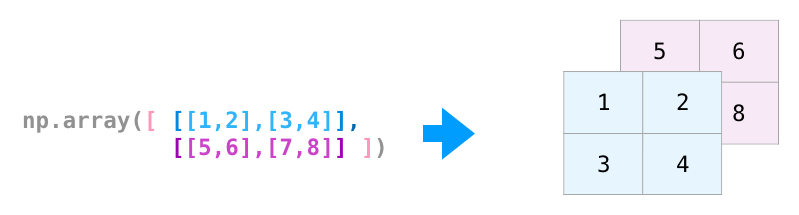

In [11]:
# 最简单的一维数组 1*3
a = np.array([1,2,3])
print(a)
print(type(a))
print(a.dtype)
print(a.shape)

[1 2 3]
<class 'numpy.ndarray'>
int32
(3,)


In [32]:
# 高维数组 2*3, 传入元组, dtype 指定类型
a = np.array(((1, 2, 3),
              (4, 5, 6)), dtype = complex)
print(a)
print(a.shape)

[[1.+0.j 2.+0.j 3.+0.j]
 [4.+0.j 5.+0.j 6.+0.j]]
(2, 3)


In [14]:
# 高维数组 2*3*2
a = np.array([
    [[1,1], [2,2],[3,3]],
    [[4,4], [5,5], [6,6]]
])

print(a)
print(a.shape)

[[[1 1]
  [2 2]
  [3 3]]

 [[4 4]
  [5 5]
  [6 6]]]
(2, 3, 2)


In [24]:
a = np.arange(15).reshape(3,5)
print(a.ndim)
print(a.dtype)
print(a.shape)
print(a.size)

2
int32
(3, 5)
15


还有其他创建 NumPy 数组的方法，如：
- `np.zeros(shape,dtype=float)` 创建指定形状的数组，每个元素均为 0
- `np.ones(shape,dtype=None)` 创建指定形状的数组，每个元素均为 1
- `np.zeros_like(a)` 用于创建与给定数组 a 相同形状的数组，每个元素均为 0
- `np.ones_like(a)` 用于创建与给定数组 a 相同形状的数组，每个元素均为 1
- `np.arange([start,] stop[, step,], dtype=None)` 创建给定起始值、终止值和步长的一维数组
- `np.linspace(start, stop, num=50, endpoint=True, dtype=None)` 创建给定起始值、终止值和元素数量的数组。其中 `endpoint` 可以选择是否包含终止值，默认包含
- `np.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)` 创建给定起始值（base ** start）、终止值（base ** stop）和元素数量的等比数列。`endpoint` 可以选择是否包含终止值

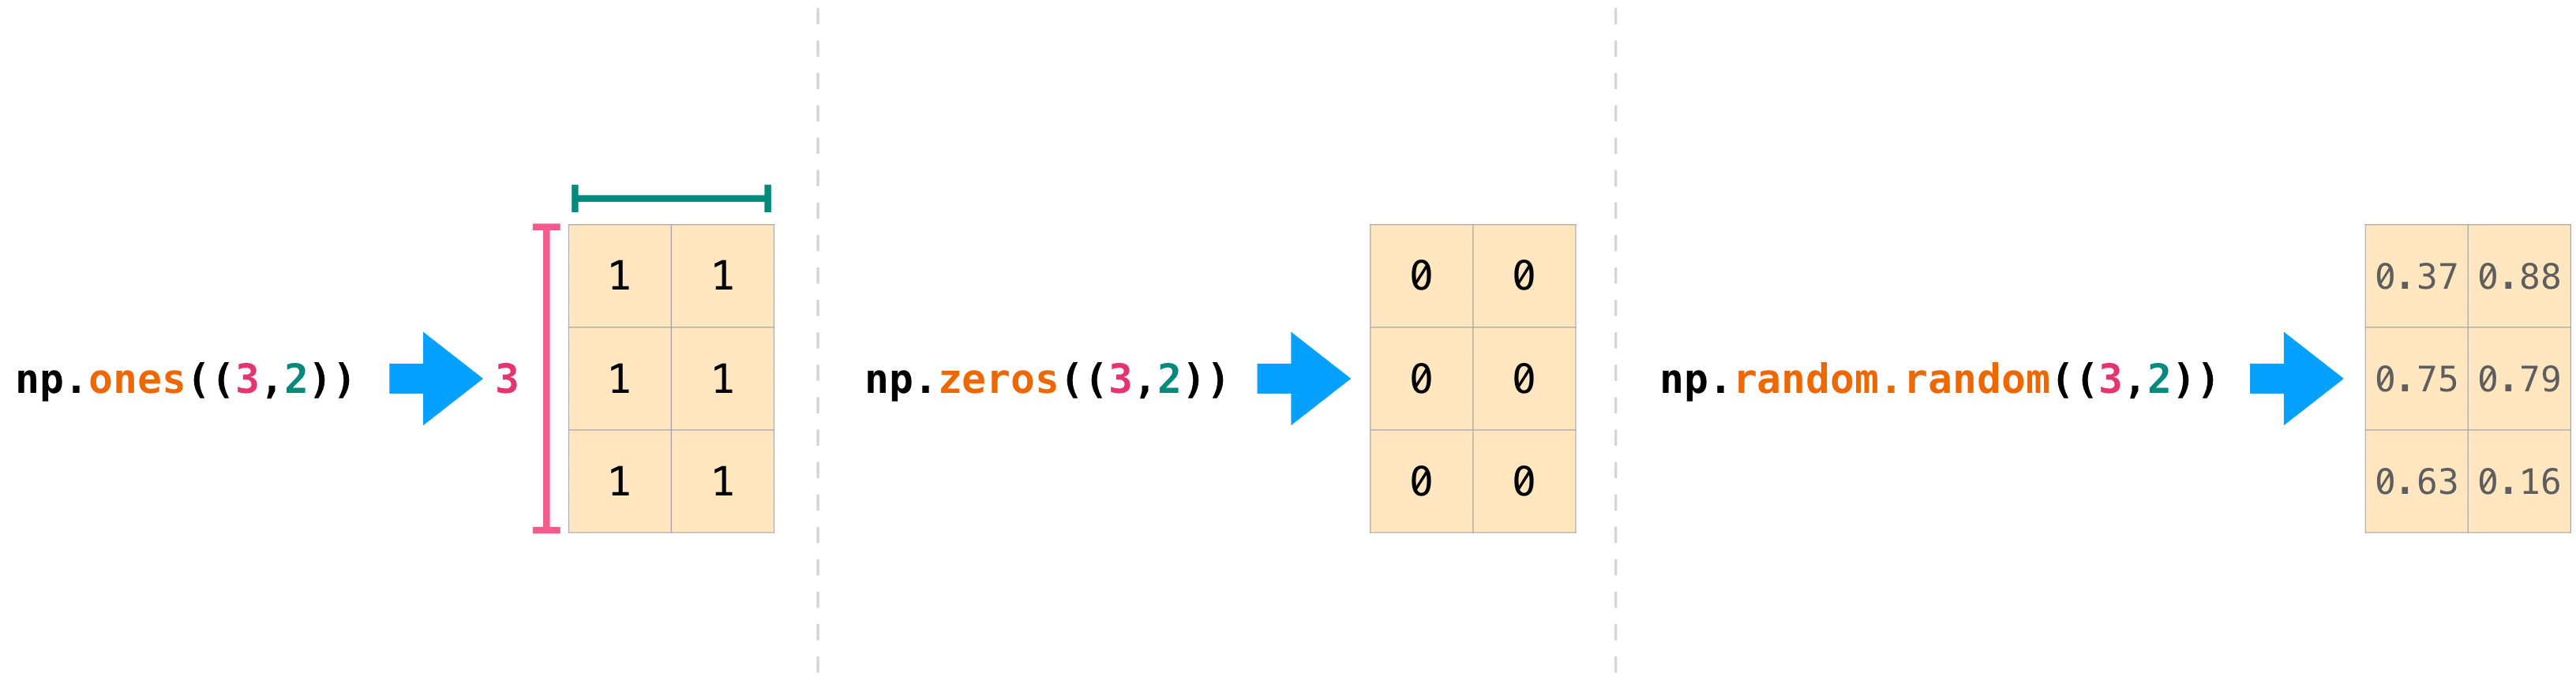

In [5]:
# 默认为浮点数
x = np.zeros(5)
print(x)

# 更换为整数
x = np.zeros(5,dtype=int)
print(x)

# 更换为字符串
x = np.zeros(5,dtype=str)
print(x)

# 定义形状
x = np.zeros((2,2))
print(x)

[0. 0. 0. 0. 0.]
[0 0 0 0 0]
['' '' '' '' '']
[[0. 0.]
 [0. 0.]]


In [7]:
# 默认为浮点数
x = np.ones(5)
print(x)

# 定义形状
x = np.ones((1,2,3))
print(x)

[1. 1. 1. 1. 1.]
[[[1. 1. 1.]
  [1. 1. 1.]]]


In [13]:
a = np.array([[1,2,3],[4,5,6]])
print(a)

x = np.zeros_like(a)
print(x)
x = np.ones_like(a)
print(x)

[[1 2 3]
 [4 5 6]]
[[0 0 0]
 [0 0 0]]
[[1 1 1]
 [1 1 1]]


In [22]:
x = np.arange(1,10,1)
y = np.arange(5,30,8)
print(x)
print(y)

x = np.linspace(1,10,10)
y = np.linspace(5,30,8)
print(x)
print(y)

[1 2 3 4 5 6 7 8 9]
[ 5 13 21 29]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 5.          8.57142857 12.14285714 15.71428571 19.28571429 22.85714286
 26.42857143 30.        ]


In [8]:
x = np.logspace(0,2,10)
print(x)

x = np.logspace(0,9,10,base=2)
print(x)

[  1.           1.66810054   2.7825594    4.64158883   7.74263683
  12.91549665  21.5443469   35.93813664  59.94842503 100.        ]
[  1.   2.   4.   8.  16.  32.  64. 128. 256. 512.]


NumPy 支持的数据类型比 Python 内置的类型要多很多，基本上可以和 C 语言的数据类型对应上。这里简单提一下：

| int16 | int 32 |  float16 | float32 |
| :---: | :---: | :---: | :---: |
| 整数（-32768 - 32767）|整数 （-2147483648 - 2147483647）| 半精度浮点数 |单精度浮点数 |

其他的还有 `int64`, `float64`, `complex64`, `bool_`, `float_` 等，它们都是 `ndarray.dtype` 返回的值。

NumPy 当然也还支持字符串的类型，以及对字符串的各种操作。本节不做更多介绍，有需要请查看官方文档。

## 6.3 数组的基本操作

### 6.3.1 数学运算
数组上的算术运算符会应用到元素级别，也就是对每个元素进行相应的数学操作，这些函数叫做通函数（ufunc），它们的运算速度比直接利用 for 循环再计算要快的多，因为它们的底层代码是用 C 写的：
- `np.sin()`, `np.cos()`, `np.tan()` 对每个元素计算相应的三角函数值
- `np.arcsin()`, `np.arccos()`, `np.arctan()` 对每个元素计算相应的反三角函数值
- `np.exp()`, `np.sqrt()`, `np.log()` 对每个元素计算相应的 $e$ 指数，根号，$\ln$ 对数
- `np.around()`, `np.floor()`, `np.ceil` 对每个元素分别返回四舍五入、向下取整、向上取整
- `np.add()`, `np.subtract()`, `np.multiply()`, `np.divide()` 计算两个数组的四则运算
- `np.reciprocal()` 返回每个元素的倒数
- `np.power(a,b)` 返回 a 中每个元素为底数，b 中相应元素为指数，计算出的数构成的数组
- `np.max()`, `np.min`, `np.sum` 返回整个数组的最大值、最小值、数组之和
- ...还有很多很多，有需要请查官方文档

部分数学运算还可以指定轴进行，见下图：
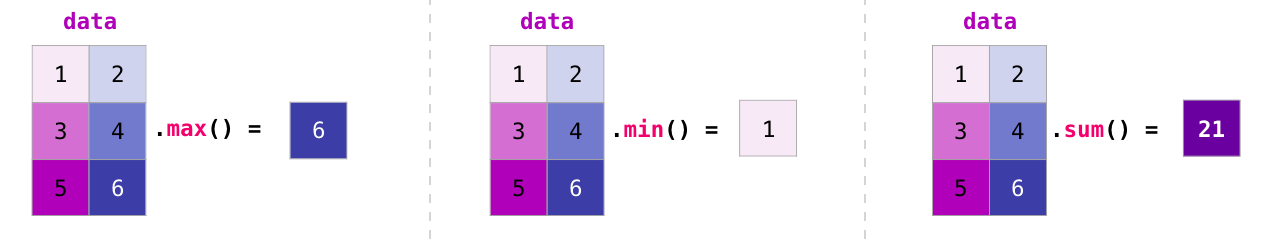

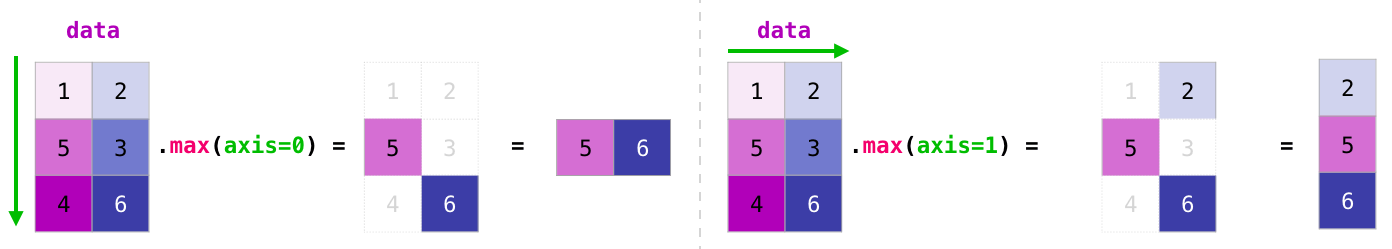

需要注意的是，将两个数组用 `*` 进行运算，得到的是按相应位置的元素相乘组成的数组；如果是想做矩阵乘法，可以使用 `@` 或 `dot` 函数。

In [85]:
a = np.array([20,30,40,50]) # [20,30,40,50]
b = np.arange(4) # [0,1,2,3]
c = a-b
print(c,'\n')

print(b**2)
print(np.sin(a))
print(np.exp(a))

[20 29 38 47] 

[0 1 4 9]
[ 0.91294525 -0.98803162  0.74511316 -0.26237485]
[4.85165195e+08 1.06864746e+13 2.35385267e+17 5.18470553e+21]


In [77]:
# 按元素相乘和矩阵乘法

A = np.array([
    [1,1],
    [0,1]
])
B = np.array([
    [2,0],
    [3,4]
])

print(A*B)
print(A@B)
print(A.dot(B))

[[2 0]
 [0 4]]
[[5 4]
 [3 4]]
[[5 4]
 [3 4]]


In [87]:
# 对数组元素求和、找最大值、最小值
a = np.random.random((2,3))
print(a)

print(np.around(a)) # 四舍五入
print(a.sum())
print(a.min())
print(a.max())

[[0.31522468 0.61474582 0.51901399]
 [0.04683929 0.19459388 0.42497449]]
[[0. 1. 1.]
 [0. 0. 0.]]
2.1153921425828983
0.046839293173163155
0.6147458164581118


In [89]:
# np.power()

a = np.array([1,10,100])
print(np.power(a,2))

b = np.array([1,2,3])
print(np.power(a,b))

[    1   100 10000]
[      1     100 1000000]


### 6.3.2 更改数组形状

另外还有各种更改数组形状的操作：
- `ndarray.shape()` 和 `ndarray.reshape()` 可以用来指定调整后数组的形状，两者区别在于前者直接改变了原数组的形状，而后者返回一个指定形状的新数组。
- `ndarray.ravel()` 返回展开数组，可以指定按 C 语言的风格还是 Fortran 语言的风格展开，注意这个修改会改变原数组的形状。
- `np.transpose()` 和 `ndarray.T` 都返回原数组的转置。
- ...还有好多

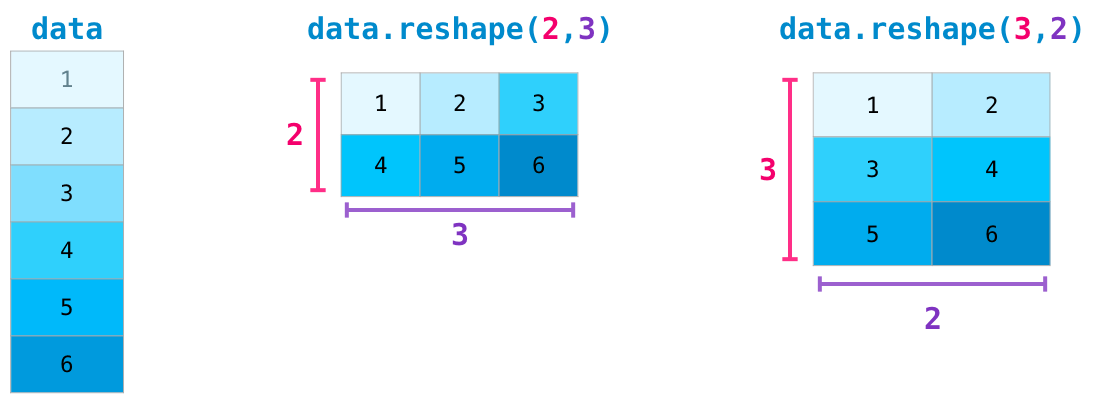


不同的数组也可以连接在一起：
- `np.stack()` 沿着新的轴加入数组
- `np.hstack()` 水平堆叠序列中的数组（列方向）
- `np.vstack()` 竖直堆叠序列中的数组（行方向）

还有 `np.tile()` 可以指定次数来重复数组。
<div class="alert alert-block alert-success">
    从这个角度可以很容易理解：把参与变换的数组看成一个整体。我们说的重复实际上是把这个整体进行变换（不要上来就把整体分拆成单个元素去理解）。
</div>

一个数组也可以进行分割：
- `np.split()` 将一个数组分隔为多个子数组
- `np.hsplit()` 将一个数组水平分割为多个子数组（列方向）
- `np.vsplit()` 将一个数组垂直分割为多个子数组（行方向）

In [98]:
a = np.arange(6)
print(a,'\n')

b = a.reshape(3,2) # a.reshape 不改变 a 的形状
print(a,'\n')
print(b,'\n')

a.shape = (3,2) # a.shape() 改变 a 的形状
print(a,'\n')
print(a.T,'\n')
print(np.transpose(a))

[0 1 2 3 4 5] 

[0 1 2 3 4 5] 

[[0 1]
 [2 3]
 [4 5]] 

[[0 1]
 [2 3]
 [4 5]] 

[[0 2 4]
 [1 3 5]] 

[[0 2 4]
 [1 3 5]]


In [104]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])
print(a,'\n')
print(b,'\n')

print ('沿轴 0 堆叠两个数组：')
print (np.stack((a,b),0))
print ('\n')
 
print ('沿轴 1 堆叠两个数组：')
print (np.stack((a,b),1))

print('\n')
print ('水平堆叠：')
print(np.hstack((a,b)))

print('\n')
print ('竖直堆叠：')
print(np.vstack((a,b)))

[[1 2]
 [3 4]] 

[[5 6]
 [7 8]] 

沿轴 0 堆叠两个数组：
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


沿轴 1 堆叠两个数组：
[[[1 2]
  [5 6]]

 [[3 4]
  [7 8]]]


水平堆叠：
[[1 2 5 6]
 [3 4 7 8]]


竖直堆叠：
[[1 2]
 [3 4]
 [5 6]
 [7 8]]


In [105]:
a = np.arange(9)
 
print ('第一个数组：')
print (a)
print ('\n')
 
print ('将数组分为三个大小相等的子数组：')
b = np.split(a,3)
print (b)
print ('\n')
 
print ('将数组在一维数组中表明的位置分割：')
b = np.split(a,[4,7])
print (b)

第一个数组：
[0 1 2 3 4 5 6 7 8]


将数组分为三个大小相等的子数组：
[array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8])]


将数组在一维数组中表明的位置分割：
[array([0, 1, 2, 3]), array([4, 5, 6]), array([7, 8])]


In [108]:
a = np.arange(16).reshape(4, 4)
print('第一个数组：')
print(a)
print('\n')

print('默认分割（0轴）：')
b = np.split(a,2)
print(b)
print('\n')

print('沿水平方向分割：')
c = np.split(a,2,1)
print(c)
print('\n')

print('沿水平方向分割：')
d= np.hsplit(a,2)
print(d)
print('\n')

print('沿竖直方向分割：')
c = np.split(a,2,0)
print(c)
print('\n')

print ('沿竖直方向分割：')
b = np.vsplit(a,2)
print (b)

第一个数组：
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


默认分割（0轴）：
[array([[0, 1, 2, 3],
       [4, 5, 6, 7]]), array([[ 8,  9, 10, 11],
       [12, 13, 14, 15]])]


沿水平方向分割：
[array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [12, 13]]), array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15]])]


沿水平方向分割：
[array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [12, 13]]), array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15]])]


沿竖直方向分割：
[array([[0, 1, 2, 3],
       [4, 5, 6, 7]]), array([[ 8,  9, 10, 11],
       [12, 13, 14, 15]])]


沿竖直方向分割：
[array([[0, 1, 2, 3],
       [4, 5, 6, 7]]), array([[ 8,  9, 10, 11],
       [12, 13, 14, 15]])]


In [16]:
# np.tile()
#    >>> a = np.array([0, 1, 2])
#     >>> np.tile(a, 2)
#     array([0, 1, 2, 0, 1, 2])
#     >>> np.tile(a, (2, 2))
#     array([[0, 1, 2, 0, 1, 2],
#            [0, 1, 2, 0, 1, 2]])
#     >>> np.tile(a, (2, 1, 2))
#     array([[[0, 1, 2, 0, 1, 2]],
#            [[0, 1, 2, 0, 1, 2]]])
    
#     >>> b = np.array([[1, 2], [3, 4]])
#     >>> np.tile(b, 2)
#     array([[1, 2, 1, 2],
#            [3, 4, 3, 4]])
#     >>> np.tile(b, (2, 1))
#     array([[1, 2],
#            [3, 4],
#            [1, 2],
#            [3, 4]])
    
#     >>> c = np.array([1,2,3,4])
#     >>> np.tile(c,(4,1))
#     array([[1, 2, 3, 4],
#            [1, 2, 3, 4],
#            [1, 2, 3, 4],
#            [1, 2, 3, 4]])

a = np.array([0,1,2])

print(np.tile(a,2),'\n')
print(np.tile(a,(1,2)),'\n')
print(np.tile(a,(2,1)),'\n')
print(np.tile(a,(2,2)),'\n')
print(np.tile(a, (2, 1, 2)))


[0 1 2 0 1 2] 

[[0 1 2 0 1 2]] 

[[0 1 2]
 [0 1 2]] 

[[0 1 2 0 1 2]
 [0 1 2 0 1 2]] 

[[[0 1 2 0 1 2]]

 [[0 1 2 0 1 2]]]


## 6.4 数组的切片和索引

### 6.4.1 常规的索引和切片
NumPy 打印数组的方式和嵌套列表打印的方式类似，具体规则如下：
- 最后一个轴从左到右打印
- 倒数第二个轴从上到下打印
- 其余部分也从上到下打印，每个切片用空行分隔
然后将一维数组打印为行，将二维数据打印为矩阵，将三维数据打印为矩数组表，请见以下例子。

In [49]:
a= np.arange(12).reshape(4,3) # 4行3列的矩阵，第0个轴表示4行，第1个轴表示3列
print(a)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [41]:
a = np.arange(24).reshape(2,3,4) # 2*3*4的数组，这是一个3维数组
print(a)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


ndarray 对象的内容可以通过索引或切片来访问和修改，和 Python 中列表的操作一样。

In [73]:
# 最简单的一维数组
a = np.arange(10)

print(a)
print(a[0])
print(a[-1])
print(a[1:5:1])
print(a[1:])
print(a[1::2])
print(a[-1::-1])

# 通过索引可以直接修改指定位置的元素
a[[0,1,2]] = 999
print(a)

[0 1 2 3 4 5 6 7 8 9]
0
9
[1 2 3 4]
[1 2 3 4 5 6 7 8 9]
[1 3 5 7 9]
[9 8 7 6 5 4 3 2 1 0]
[999 999 999   3   4   5   6   7   8   9]


多维的数组每个轴都可以有一个索引，用 `[]` 将索引括起来，每个轴的索引用 `,`隔开。
如果提供的索引少于轴的数量时，缺失的索引就用 `:` 来代替，相当于认为是其他轴的完整切片。

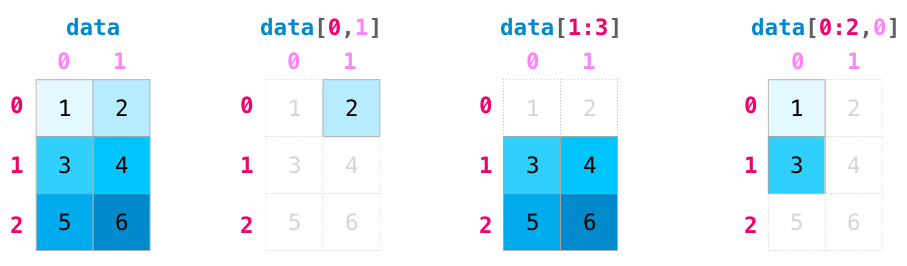

In [92]:
# 2维数组
a= np.arange(12).reshape(4,3)
print(a)

print('-'*20)

print(a[0],'\n')
print(a[3,2],'\n')
print(a[-1,-1],'\n')
print(a[:,0],'\n')
print(a[0::2,0::2],'\n')
print(a[0::2,1::2],'\n')

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
--------------------
[0 1 2] 

11 

11 

[0 3 6 9] 

[[0 2]
 [6 8]] 

[[1]
 [7]] 



如果想访问数组中的每个元素，可以用 `flat`属性来完成。这样可以逐个对元素完成我们想要的操作。

In [37]:
a= np.arange(12).reshape(4,3)

for element in a.flat:
    print(element)

0
1
2
3
4
5
6
7
8
9
10
11


数组里的元素是可以重复的，如果我们想提取出数组中唯一的元素，可以通过 `np.unique()` 来完成。

In [41]:
a = np.array([11, 11, 12, 13, 14, 15, 16, 17, 12, 13, 11, 14, 18, 19, 20])
unique_values = np.unique(a)
print(unique_values)

unique_values, indices_list = np.unique(a, return_index=True)
# 可以返回唯一元素的索引（第一次出现的位置）
print(indices_list)

# 还可以计算重复次数
unique_values, occurrence_count = np.unique(a, return_counts=True)
print(occurrence_count)

[11 12 13 14 15 16 17 18 19 20]
[ 0  2  3  4  5  6  7 12 13 14]
[3 2 2 2 1 1 1 1 1 1]


### 6.4.2 花式索引
除此之外，NumPy 比一般的 Python 序列提供了更多的索引方式。比如我们可以通过一个整数数组来访问另一个数组的元素，这种方法我们称为**花式索引**。

In [56]:
a = np.arange(12)**2 # 被索引的数组


print(a[
    [1,1,3,8,5] # 索引第 2,2,4,9,6 个元素
])

print(a[ 
    [[3,4],
    [9,7]]  # 索引第 4,5,10,8 个元素，并将结果构成 2*2 的数组
])

[ 1  1  9 64 25]
[[ 9 16]
 [81 49]]


上面我们举的例子被索引的数组 `a` 是一维的，比较容易理解。但如果 `a` 是多维的，索引值只有一个数的情况下，就代表是沿第一个轴开始索引的，这在前面常规的索引里我们已经提到过了。

当然索引值也可以是多个维度而非单个数。

In [1]:
a = np.arange(12).reshape(3,4)
print(a)
print('-'*20)

i = np.array([ [0,1],
               [1,2] ])
j = np.array([ [2,1],
               [3,3] ])


print(a[i,j],'\n') # 返回 (0,2),(1,1),(1,3),(2,3) 位置处的元素
print(a[:,j])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
--------------------
[[ 2  5]
 [ 7 11]] 

[[[ 2  1]
  [ 3  3]]

 [[ 6  5]
  [ 7  7]]

 [[10  9]
  [11 11]]]


### 6.4.3 布尔索引
我们可以通过一个布尔数组来索引目标数组，只会打印满足 True 位置的元素。请看以下实例

In [82]:
a = 10*np.random.random(10).reshape(2,5)

print('原数组是：',a,'\n')
print(a>5,'\n') # 生成一个布尔数组，大于5的元素位置用 True 来代替
print(a[a>5],'\n') # 只会打印出 True 位置的元素

# 将 >5 的元素全部替换为0
a[a>5] = 0
print(a)

原数组是： [[3.34314437 5.02923135 9.85732925 8.57063599 0.21556393]
 [5.26509483 5.99435949 0.24976522 6.38032229 5.25422292]] 

[[False  True  True  True False]
 [ True  True False  True  True]] 

[5.02923135 9.85732925 8.57063599 5.26509483 5.99435949 6.38032229
 5.25422292] 

[[3.34314437 0.         0.         0.         0.21556393]
 [0.         0.         0.24976522 0.         0.        ]]


In [97]:
# 过滤掉非复数元素
a = np.array([1,  2+6j,  5,  3.5+5j])  
print (a[np.iscomplex(a)])

[2. +6.j 3.5+5.j]


曼德勃罗集（Mandelbrot set）是一种在复平面上组成分形的点的集合（这玩意儿又被称为“上帝指纹”）。它可以用二次多项式来定义：

$f_c(z) = z^2+c$

其中 $c$ 是一个复数参数。从 $z=0$ 开始对 $f_c(z)$ 进行迭代 $z_{n+1} = z_n^2 + c, \quad n=0,1,2,\cdots$.

则 $z_0=0$, $z_1 = z_0^2+c = c$, $z_2=z_1^2+c = c^2+c$, $\cdots$，迭代 $n$ 次后，我们就得到了一个序列 $(z_0,z_1,z_2,\cdots,z_n)$。随着迭代次数增加，这其中部分 $z_i$ 的绝对值会非常大甚至发散到无穷大，当然也可能收敛在有限的区域内。曼德勃罗集就是使序列里不延伸至无穷大的所有复数 $c$ 的集合。

在计算机程序里，我们可以设置一个有限的迭代次数 $n$，然后一个确定的阈值 $M$，当迭代完成后还没有超过阈值 $M$ 的复数 $c$ 我们就认为它属于曼德勃罗集。在判断是否超过阈值这里我们就用到了布尔数组，请见以下 Python 实例。

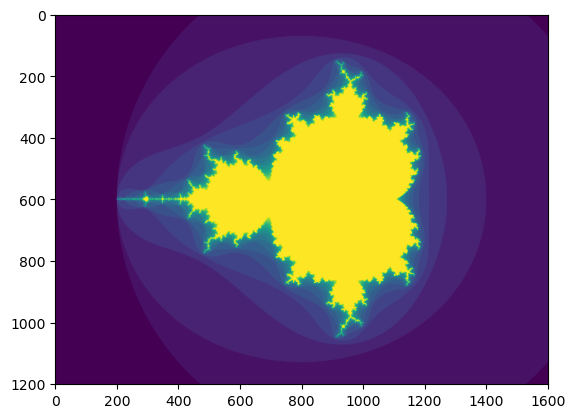

In [96]:
import numpy as np
import matplotlib.pyplot as plt
def mandelbrot(h, w, maxit=20, r=2):
    """
    Returns an image of the Mandelbrot fractal of size (h,w).
    """
    # 划分网格
    x = np.linspace(-2.5, 1.5, 4*h+1) # 网格内的点横坐标 x 代表实部
    y = np.linspace(-1.5, 1.5, 3*w+1) # 网格内的点纵坐标 y 代表实部
    A, B = np.meshgrid(x, y)
    C = A + B*1j # 将网格上的点和复数 C 一一映射
    z = np.zeros_like(C)
    divtime = maxit + np.zeros(z.shape, dtype=int) # 创建一个数组，网格上每个点对应的数都是阈值

    for i in range(maxit):
        z = z**2 + C
        diverge = abs(z) > r                    # who is diverging
        div_now = diverge & (divtime == maxit)  # who is diverging now
        divtime[div_now] = i                    # note when
        z[diverge] = r                          # avoid diverging too much

    return divtime

plt.clf()
plt.imshow(mandelbrot(400, 400))
# plt.savefig('mandelbrot.png',dpi=1000)

## 6.5 数组的广播

广播（broadcast）是 NumPy 对不同形状的数组进行计算的方式。

举个简单的例子，假设我们拥有两个形状相同的数组，那么 `a*b` 的结果就是两个数组对应位置的元素相乘。但如果两个数组形状不同呢？这时候 Python 就会启动广播机制，自动将所有输入数组向其中形状最长的数组看齐，当补齐数组形状后，Python 在进行数组的运算。

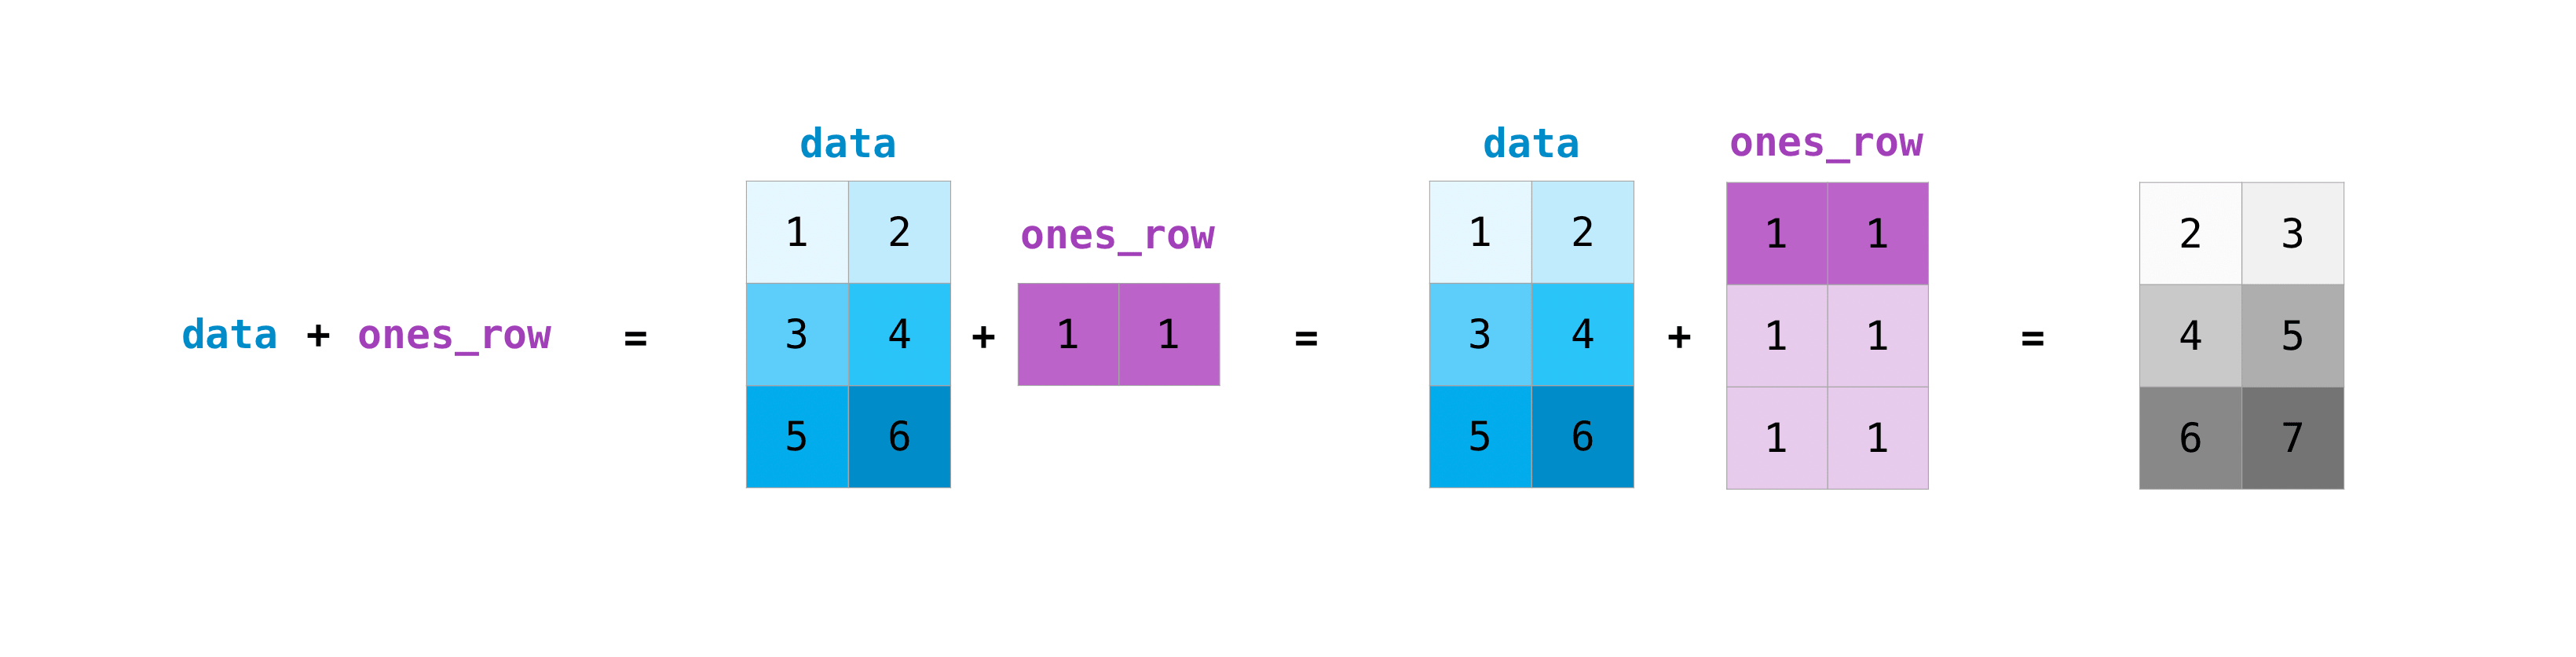

In [27]:
a = np.array([
    [0,0,0],
    [10,10,10],
    [20,20,20],
    [30,30,30]
])
b = np.array([0,1,2])
bb = np.tile(b,(4,1))

# a + b 和 a + bb 结果是一样的，bb 其实就是 b 广播之后的形式
print(a+b,'\n')
print(a+bb,'\n')

# 同理 a*b 和 a*bb 结果也是一样的
print(a*b,'\n')
print(a*bb,'\n')

[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]] 

[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]] 

[[ 0  0  0]
 [ 0 10 20]
 [ 0 20 40]
 [ 0 30 60]] 

[[ 0  0  0]
 [ 0 10 20]
 [ 0 20 40]
 [ 0 30 60]] 



In [34]:
a = np.array([1,2]) # 1*2 的数组
b = np.array([[1],[2]]) # 2*1 的数组

# 从打印结果可以发现，a 和 b 都被广播了
print(a+b)

[[2 3]
 [3 4]]


数组的广播有以下几个规则：
1. 让所有输入数组都想其中形状最长的数组看齐，形状中不足的部分都通过在已有元素的基础上重复补齐。
2. 输出数组的形状是输入数组形状的各个维度上的最大值。（比如 $1\times 2$ 的数组和 $2\times 1$ 的数组相加得到的结果是 $2\times 2$ 的数组。）
3. 如果输入数组的某个维度和输出数组的对应维度的长度相同或者其长度为 1 时，这个数组能够用来计算，否则出错。（比如 $3\times 2$ 的数组和 $2\times 3$ 的数组就无法进行计算，因为没办法广播这两个数组到一样的形状）
4. 当输入数组的某个维度的长度为 1 时，沿着此维度运算时都用此维度上的第一组值。

简单来说，数组广播需满足以下条件之一，否则程序报错：
1. 数组拥有相同形状。
2. 当前维度的值相等。
3. 当前维度的值有一个是 1。


## 6.6 线性代数

NumPy 也提供了线性代数函数库 linalg，支持了线性代数里的操作（当然部分操作利用 ndarray 的属性也能实现）。
- `dot(array,array)` 一维数组为内积，多维数组为矩阵乘法
- `vdot(array,array)` 两个矩阵对应位置元素乘积之和（对向量来说就是内积）
- `inner(array,array)` 一维数组的内积，多维时取最后一维的内积
- `outer(array,array)` 一维数组的外积，多维数组也展平为一维计算
- `linalg.det(array)` 计算数组的行列式
- `linalg.solve(a,b)` 求解线性矩阵方程
- `linalg.inv(array)` 计算矩阵的乘法逆矩阵

In [103]:
a = np.array([[1,2],[3,4]]) 
b = np.array([[11,12],[13,14]]) 
 
print (np.vdot(a,b))
print (np.inner(a,b))
print(np.outer(a,b))

print(np.linalg.det(a))
print(np.linalg.det(b))

130
[[35 41]
 [81 95]]
[[11 12 13 14]
 [22 24 26 28]
 [33 36 39 42]
 [44 48 52 56]]
-2.0000000000000004
-2.0000000000000013


计算线性矩阵方程，比如

$$
\begin{cases}
x+y+z=6\\[.2cm]
2y+5z=-4\\[.2cm]
2x+5y-z = 27
\end{cases}
\quad \Rightarrow \quad \begin{pmatrix}
1&1&1\\
0&2&5\\
2&5&-1
\end{pmatrix}
\begin{pmatrix}
x\\y\\z
\end{pmatrix}
=\begin{pmatrix}
6\\-4\\27
\end{pmatrix}
$$

In [105]:
a = np.array([
    [1,1,1],
    [0,2,5],
    [2,5,-1]
])
b = np.array([6,-4,27])
print(np.linalg.solve(a,b))

[ 5.  3. -2.]


In [109]:
x = np.array([[1,2],[3,4]]) 
y = np.linalg.inv(x) 

print (x)
print (y)
print (x@y)

[[1 2]
 [3 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]
[[1.00000000e+00 1.11022302e-16]
 [0.00000000e+00 1.00000000e+00]]


NumPy 还有很多内容，这一节只是做了一个简短的介绍，更多内容请查看官方文档。

## 6.7 References
- [1] [NumPy](https://numpy.org/)
- [2] [A Visual Intro to NumPy and Data Representation - Jay Alammar](https://jalammar.github.io/visual-numpy/)
- [3] [NumPy 教程 - 菜鸟教程](https://www.runoob.com/numpy/numpy-tutorial.html)
- [4] [NumPy 中文网](https://www.numpy.org.cn/)